# Categorizing Chinese News Articles from the Web
Name: 張家豪
Student ID: 0716021

In [1]:
import json
f = open('data/cna.json')

data = json.load(f)

In [2]:
categories = [ doc['category'] for doc in data ]
print(len(data))
print('Number of unique categories', len(set(categories)))
print(set(categories))
category_map = {
    cat: idx for idx, cat in enumerate(set(categories))
}
category_map

19826
Number of unique categories 6
{'產經', '運動', '科技', '政治', '娛樂', '社會'}


{'產經': 0, '運動': 1, '科技': 2, '政治': 3, '娛樂': 4, '社會': 5}

In [3]:
category_count = { cat: 0 for cat in set(categories) }
first_brak = list()

In [4]:
data[0]

{'_id': {'$oid': '602b59c9df6290789c381d06'},
 'title': '修憲工程春節後啟動 柯建銘：絕不走極端',
 'content': ['（中央社記者溫貴香、王揚宇台北16日電）力拚2022憲改公投綁大選，民進黨團總召柯建銘今天表示，春節連假過後將啟動修憲工程，會負責任提出黨版修憲案，並強調任何題目都可以談且都會去思考，但民進黨絕不會走極端。',
  '民進黨立法院黨團總召柯建銘受訪表示，修憲應由總統主導，涉及國家政府體制的建立，這是總統無法迴避的責任，總統也不會迴避，要尊重由總統主導。民進黨是執政黨，要主導國會修憲。',
  '他說，2019年12月的美麗島事件40周年、世界人權日，立法院會三讀通過監察院國家人權委員會組織法，監察院下設國家人權委員會，由監察院長擔任主任委員。同時，修正通過考試院組織法部分條文，考試委員名額從19人改為7人至9人，考試院長、副院長及考試委員任期從6年改為4年，與總統任期一致。',
  '柯建銘說，18歲公民權已是普世價值，過去民進黨一直強烈主張，自創黨以來，民進黨中央從來沒有停止過修憲的討論，這次也是一樣；民進黨執政必須尊重由總統主導修憲，包括中央政府體制、五權變三權、不分區席次票票不等值、閣揆同意權等，民進黨一定會提出一個版本。',
  '柯建銘表示，修憲必須要有黨版，哪些問題可能會成功，哪些問題屬於理念闡述，都必須仔細評估，最後一定會有黨版。他強調，修憲提案沒有併大選絕對不會成功，即使併大選要成功闖關，也必須朝野有高度共識，否則會一事無成。',
  '他表示，修憲提案要併2022年直轄市暨縣市長選舉，必須先往回推算，約大選日9個月前要送出修憲提案；因為修憲提案必須先公告半年加上3個月後投票，總計需9個月時間，前置作業又包括何時開公聽會、要拋出什麼議題等，必須先行設定期程。',
  '至於修憲併2022年大選時間是否太趕，柯建銘表示，「不會」，修憲案若不併2022年大選根本是自殺式修憲，下修18歲公民權的修憲案，若做民調並不是壓倒性的勝利，必須各政黨高度動員與合作才有可能超過965萬票，這絕對不是朝野政黨比賽搶功勞、爭功諉過的題目。',
  '柯建銘表示，這次修憲有很多題目，不管是個別立委提案或民間團體倡議，例如環境權、人權入憲、勞動權等，都可以談且都會去思考；另涉及變更領土、國號等

# Remove common strings

In [5]:
for idx,doc in enumerate(data):
    category_count[doc['category']] += 1
    del doc['_id']
    if doc['content'][0].find('（') == 0:
        doc['content'][0] = doc['content'][0][doc['content'][0].find('）')+1:]
    if doc['content'][-1].rfind('（') != -1:
        doc['content'][-1] = doc['content'][-1][:doc['content'][-1].rfind('（')]
    doc['content'] = ''.join(line.strip() for line in doc['content'])

In [6]:
print(category_count)

{'產經': 4582, '運動': 4015, '科技': 532, '政治': 5583, '娛樂': 962, '社會': 4152}


In [7]:
data[2]

{'title': '半導體自主化成國際趨勢 台灣憂喜參半',
 'content': '歷經貿易戰、科技戰、武漢肺炎疫情及車用晶片大缺貨，各國紛紛體認到半導體是重要的戰略物資，「半導體自主化」將成國際發展趨勢。台灣半導體業位居世界第2，有喜也有憂。中國雄心壯志發展半導體產業，原先規劃2025年半導體自製率達70%。只是美中關係緊張，美國以領先的半導體作為對付中國的利器，成功圍堵華為，迫使華為出售旗下品牌「榮耀」，市占率大舉流失。市場研究機構Canalys統計，2020年第4季華為智慧手機出貨量僅約3200萬支，較蘋果(Apple)、三星(Samsung)、小米、Oppo及Vivo出貨量少，排名落居第6，是華為6年來首度跌出前5名之列。研調機構IC Insights預期，中國先進半導體設備採購難度將越來越高，未來5年、甚至10年，在自給自足方面將難以取得重大進展，至2024年半導體自製率將僅約20.7%。中國半導體發展雖遭遇阻撓，不過，建立自主可控的半導體產業鏈目標依然不變，一方面大力支持第3代半導體發展，一方面針對28奈米、65奈米及0.13微米以下半導體業推出免稅政策，範圍包括晶圓製造、IC設計、封測及材料等。美國雖為全球半導體龍頭，但為重振日漸式微的半導體製造，美國國會通過「國防授權法案」，內容包含對半導體製造的獎勵措施，協助英特爾(Intel)、三星與台積電等在美國當地建廠。歐洲聯盟對半導體發展也不鬆懈，尤其車用晶片短缺迫使車廠產線停擺，德國經濟部長阿特麥爾（Peter Altmaier）還為此向台灣求援，更加深了危機感，規劃打造完整的半導體生態系。台灣經濟研究院研究員劉佩真表示，「半導體自主化」已成國際發展趨勢，觀察各國半導體發展狀況，對於台灣半導體業短期尚不致產生威脅，反而創造許多機會。劉佩真指出，中國半導體業在美國干擾下，政策效益恐遭削弱，短期難以大幅提升。日本與歐盟各有所長，日本的強項在半導體設備與材料，歐盟則以車用電子為主。美國因英特爾先進製程技術發展遭遇瓶頸，在半導體製造方面有缺口，不過，劉佩真說，美國新興科技發展依然領先全球，未來在半導體領域仍將穩居霸主地位。劉佩真表示，台灣的優勢要讓全世界看到，利用本身的競爭優勢，與各國展開合作。台灣晶圓製造高居世界第一，尤其台積電製程技術領先全球，是台灣半導體業最關鍵的核心。隨著台灣半導體產業登上國際舞台，

In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(data)

In [9]:
df.head()

,title,content,category
0,修憲工程春節後啟動 柯建銘：絕不走極端,力拚2022憲改公投綁大選，民進黨團總召柯建銘今天表示，春節連假過後將啟動修憲工程，會負責任...,政治
1,澎湖縣道赤馬段死亡車禍 7旬老翁送醫不治,澎湖縣道203線赤馬段，昨天發生一起死亡車禍，77歲趙姓老翁疑似迴轉，黃姓遊客載林姓友人同向...,社會
2,半導體自主化成國際趨勢 台灣憂喜參半,歷經貿易戰、科技戰、武漢肺炎疫情及車用晶片大缺貨，各國紛紛體認到半導體是重要的戰略物資，「半...,產經
3,貨品因總統行程卡關？ 關務署：8日到港業者不拆櫃,媒體報導有業者年節商品卡在海關導致無法銷售，財政部關稅署今天澄清，報導所稱延誤通關的貨櫃在2...,產經
4,江惠民專訪／挑戰合法的不合理 江惠民用非常上訴追求公義,非常上訴是專屬檢察總長的職權，針對確定刑事判決的審判違背法令所設救濟方法，檢察總長江惠民認為...,社會


# Visualization

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
%config InlineBackend.figure_format="retina"

<AxesSubplot:>

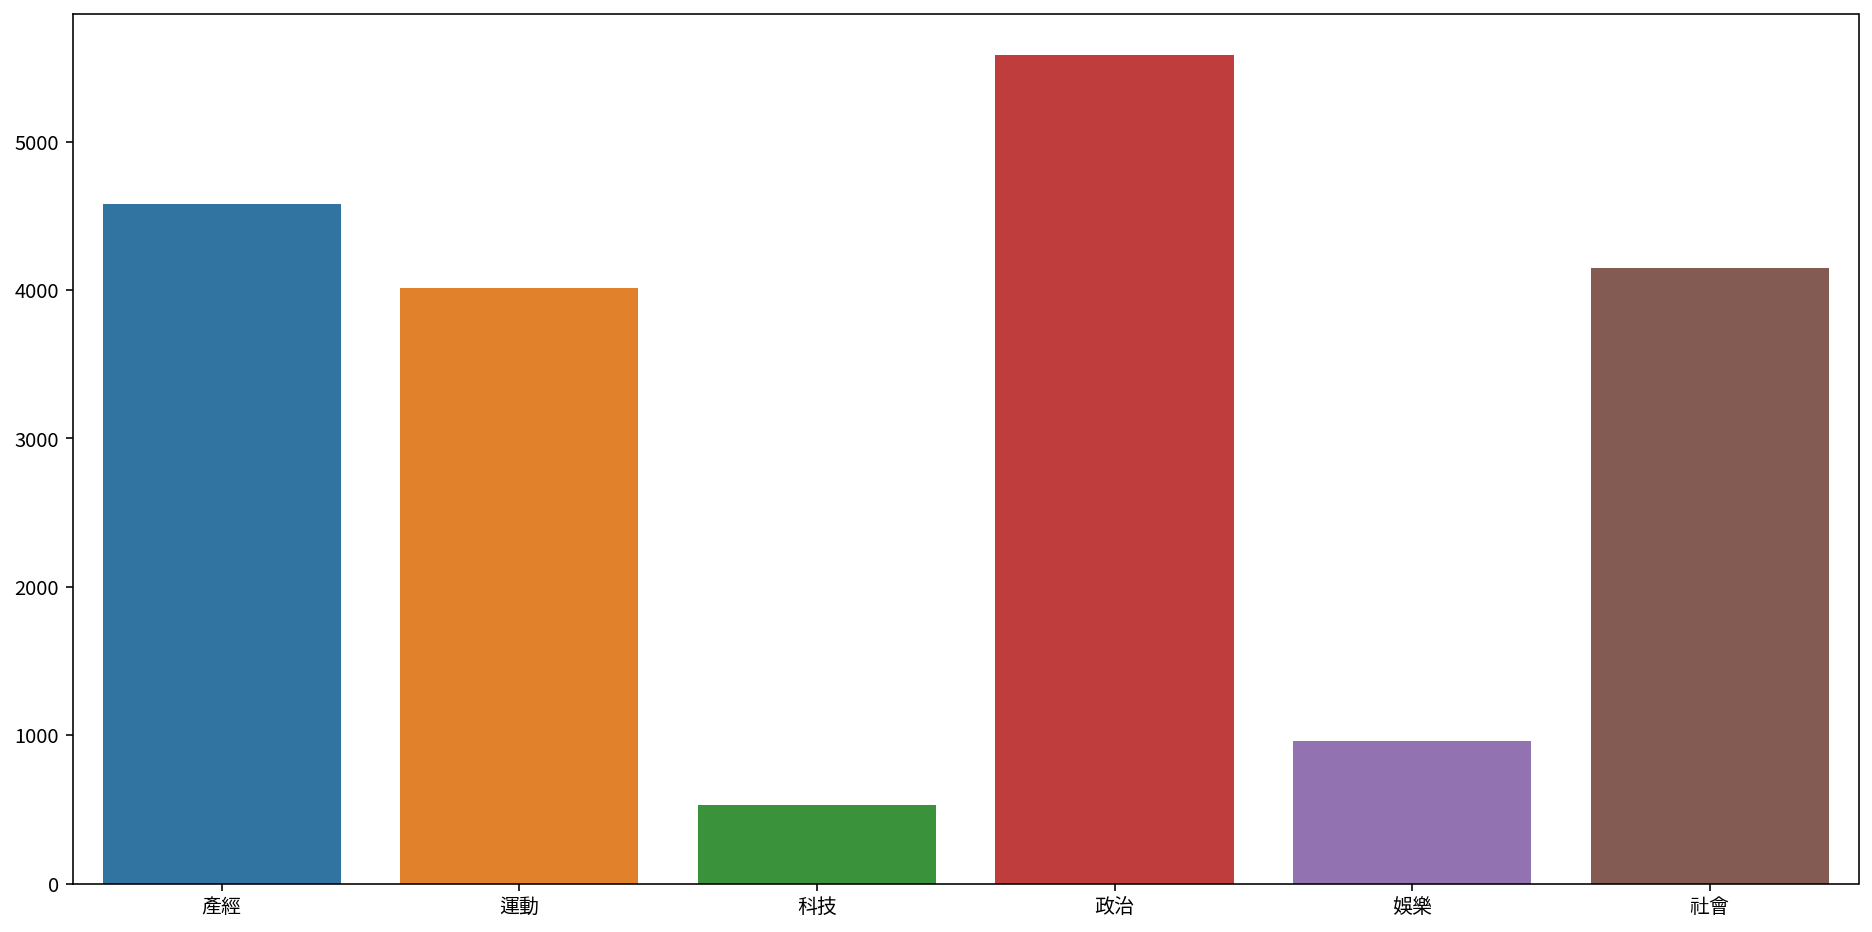

In [11]:
plt.figure(figsize=(16, 8))
sns.barplot(y=list(category_count.values()), x=list(category_count.keys()))

# Preprocessing

## Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
y = df['category']
X = df.drop(columns="category")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # set random state to retain results

In [13]:
import jieba

jieba.case_sensitive = True

In [14]:
import jieba.analyse
import jieba.posseg as pseg
def getTopTokens(news):
    tags = jieba.analyse.extract_tags(news, topK=40)
    tags = [ tag for tag in tags if not tag.isnumeric() ]
    return ' '.join(tags[:20])

def get_tokens(text):
    words = pseg.cut(text)
    return ' '.join([
        word for word, flag in words if flag != 'x' and not word.isnumeric() ])

In [15]:
X_train['joined'] = X_train['title'] + ' ' + X_train['content']
# X_train = X_train.drop(columns=['title', 'content'])
X_train

<ipython-input-15-87ed6d5d3d9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['joined'] = X_train['title'] + ' ' + X_train['content']


,title,content,joined
10802,李登輝逝世週年 日台協會設文庫專區追思,前總統李登輝逝世滿週年，日本台灣交流協會今天設立「李登輝文庫」專區，感謝李登輝基金會提供共計...,李登輝逝世週年 日台協會設文庫專區追思 前總統李登輝逝世滿週年，日本台灣交流協會今天設立「李...
4910,經濟學人稱台灣最危險地區 外交部：續維護區域穩定,經濟學人雜誌以台灣雷達圖為封面，稱這是「地球上最危險地區」。外交部今天表示，台灣將持續與理念...,經濟學人稱台灣最危險地區 外交部：續維護區域穩定 經濟學人雜誌以台灣雷達圖為封面，稱這是「地...
8085,岸信夫關注台海和平 外交部：合作維護區域穩定,日本防衛大臣岸信夫在東協防長會議中，提及台海和平穩定對區域及國際社會的重要性。外交部今天表示...,岸信夫關注台海和平 外交部：合作維護區域穩定 日本防衛大臣岸信夫在東協防長會議中，提及台海和...
2495,蘇貞昌：全力搜尋F-5E失聯飛官 查明原因向國人報告,2架F-5E戰機昨天執行訓練任務擦撞墜海，造成1名中尉殉職，1名上尉尚未尋獲。行政院長蘇貞昌...,蘇貞昌：全力搜尋F-5E失聯飛官 查明原因向國人報告 2架F-5E戰機昨天執行訓練任務擦撞墜...
10067,中華隊／科大師曾秀鳳任東奧高爾夫教練 師生應援盼奪勝,東京奧運即將開始，曾是旅日高爾夫球后的城市科大休閒系教師曾秀鳳此次再任東奧高爾夫國家教練，全...,中華隊／科大師曾秀鳳任東奧高爾夫教練 師生應援盼奪勝 東京奧運即將開始，曾是旅日高爾夫球后的...
...,...,...,...
1099,男子捷運月台性騷擾女乘客 北院判拘役40天,一名楊姓男子去年8月間2度在台北捷運月台觸摸女乘客下體恥骨處，台北地檢署依性騷擾防治法起訴。...,男子捷運月台性騷擾女乘客 北院判拘役40天 一名楊姓男子去年8月間2度在台北捷運月台觸摸女...
18898,基隆4警涉犯黑吃黑 主嫌判5年6個月、一人無罪,曾任職基隆市南榮派出所警員張晉維去年與黃民欣、周聖倫及蘇姓員警，以黑吃黑方式獲取不法利益。法...,基隆4警涉犯黑吃黑 主嫌判5年6個月、一人無罪 曾任職基隆市南榮派出所警員張晉維去年與黃民...
11798,國策顧問號召捐4輛消防救助器材車 徐國勇感謝相挺,國策顧問廖全平號召企業聯合捐贈4輛消防救助器材車。內政部長徐國勇今天出席捐贈儀式時指出，感謝...,國策顧問號召捐4輛消防救助器材車 徐國勇感謝相挺 國策顧問廖全平號召企業聯合捐贈4輛消防救助...
6637,疫情升溫美容店歇業9人聚會打牌 台中警移送裁罰,疫情升溫，台中市1家美容店暫停營業，昨天卻聚眾在店內打麻將，警方獲報前往查緝，雖未發現涉嫌賭...,疫情升溫美容店歇業9人聚會打牌 台中警移送裁罰 疫情升溫，台中市1家美容店暫停營業，昨天卻聚...


# Save tokenized content to save time

Uncomment the code below if no pickle file exists.

In [16]:
# X_train['joined'] = X_train.loc[:, 'joined'].apply(get_tokens)
# X_train.to_pickle("X_train_split.pkl")

## Read from saved

In [17]:
X_train = pd.read_pickle("X_train_split.pkl")
X_train

,title,content,joined
10802,李登輝逝世週年 日台協會設文庫專區追思,前總統李登輝逝世滿週年，日本台灣交流協會今天設立「李登輝文庫」專區，感謝李登輝基金會提供共計...,李登輝 逝世 週年 日台 協會 設 文庫 專區 追思 前總統 李登輝 逝世 滿週年 日本 台...
4910,經濟學人稱台灣最危險地區 外交部：續維護區域穩定,經濟學人雜誌以台灣雷達圖為封面，稱這是「地球上最危險地區」。外交部今天表示，台灣將持續與理念...,經濟學 人稱 台灣 最 危險 地區 外交部 續 維護 區域 穩定 經濟學 人 雜誌 以 台灣...
8085,岸信夫關注台海和平 外交部：合作維護區域穩定,日本防衛大臣岸信夫在東協防長會議中，提及台海和平穩定對區域及國際社會的重要性。外交部今天表示...,岸信夫 關注 台海 和平 外交部 合作 維護 區域 穩定 日本 防衛 大臣 岸信夫 在 東協...
2495,蘇貞昌：全力搜尋F-5E失聯飛官 查明原因向國人報告,2架F-5E戰機昨天執行訓練任務擦撞墜海，造成1名中尉殉職，1名上尉尚未尋獲。行政院長蘇貞昌...,蘇貞昌 全力 搜尋 E 失聯 飛官 查明 原因 向 國人 報告 架 F E 戰機 昨天 執行...
10067,中華隊／科大師曾秀鳳任東奧高爾夫教練 師生應援盼奪勝,東京奧運即將開始，曾是旅日高爾夫球后的城市科大休閒系教師曾秀鳳此次再任東奧高爾夫國家教練，全...,中華隊 科 大師 曾 秀鳳 任 東奧 高爾夫 教練 師生 應援 盼 奪勝 東京 奧運 即將 ...
...,...,...,...
1099,男子捷運月台性騷擾女乘客 北院判拘役40天,一名楊姓男子去年8月間2度在台北捷運月台觸摸女乘客下體恥骨處，台北地檢署依性騷擾防治法起訴。...,男子 捷運 月台 性騷擾 女 乘客 北院 判 拘役 天 一名 楊姓 男子 去年 月間 度 在...
18898,基隆4警涉犯黑吃黑 主嫌判5年6個月、一人無罪,曾任職基隆市南榮派出所警員張晉維去年與黃民欣、周聖倫及蘇姓員警，以黑吃黑方式獲取不法利益。法...,基隆 警 涉犯 黑吃黑 主嫌 判 年 個 月 人 無罪 曾 任職 基隆市 南榮 派出所 警員...
11798,國策顧問號召捐4輛消防救助器材車 徐國勇感謝相挺,國策顧問廖全平號召企業聯合捐贈4輛消防救助器材車。內政部長徐國勇今天出席捐贈儀式時指出，感謝...,國策 顧問 號召 捐 輛 消防 救助 器材車 徐國勇 感謝 相挺 國策 顧問 廖全平 號召 ...
6637,疫情升溫美容店歇業9人聚會打牌 台中警移送裁罰,疫情升溫，台中市1家美容店暫停營業，昨天卻聚眾在店內打麻將，警方獲報前往查緝，雖未發現涉嫌賭...,疫情 升溫 美容店 歇業 人 聚會 打牌 台中 警 移送 裁罰 疫情 升溫 台中市 家 美容...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5, max_features=10000)

X_trans = tfidf.fit_transform(X_train['joined']).toarray()
X_trans.shape

(13878, 10000)

In [19]:
from sklearn.manifold import TSNE
import numpy as np

projected_features = TSNE(n_components=2, random_state=0).fit_transform(X_trans) # Array of all projected features of 30% of Randomly chosen samples 
projected_features.shape

(13878, 2)

In [52]:
colors = [plt.cm.Paired(i) for i in range(1,7)]
colors

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1.0),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.2, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.984313725490196, 0.6039215686274509, 0.6, 1.0),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883, 1.0)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

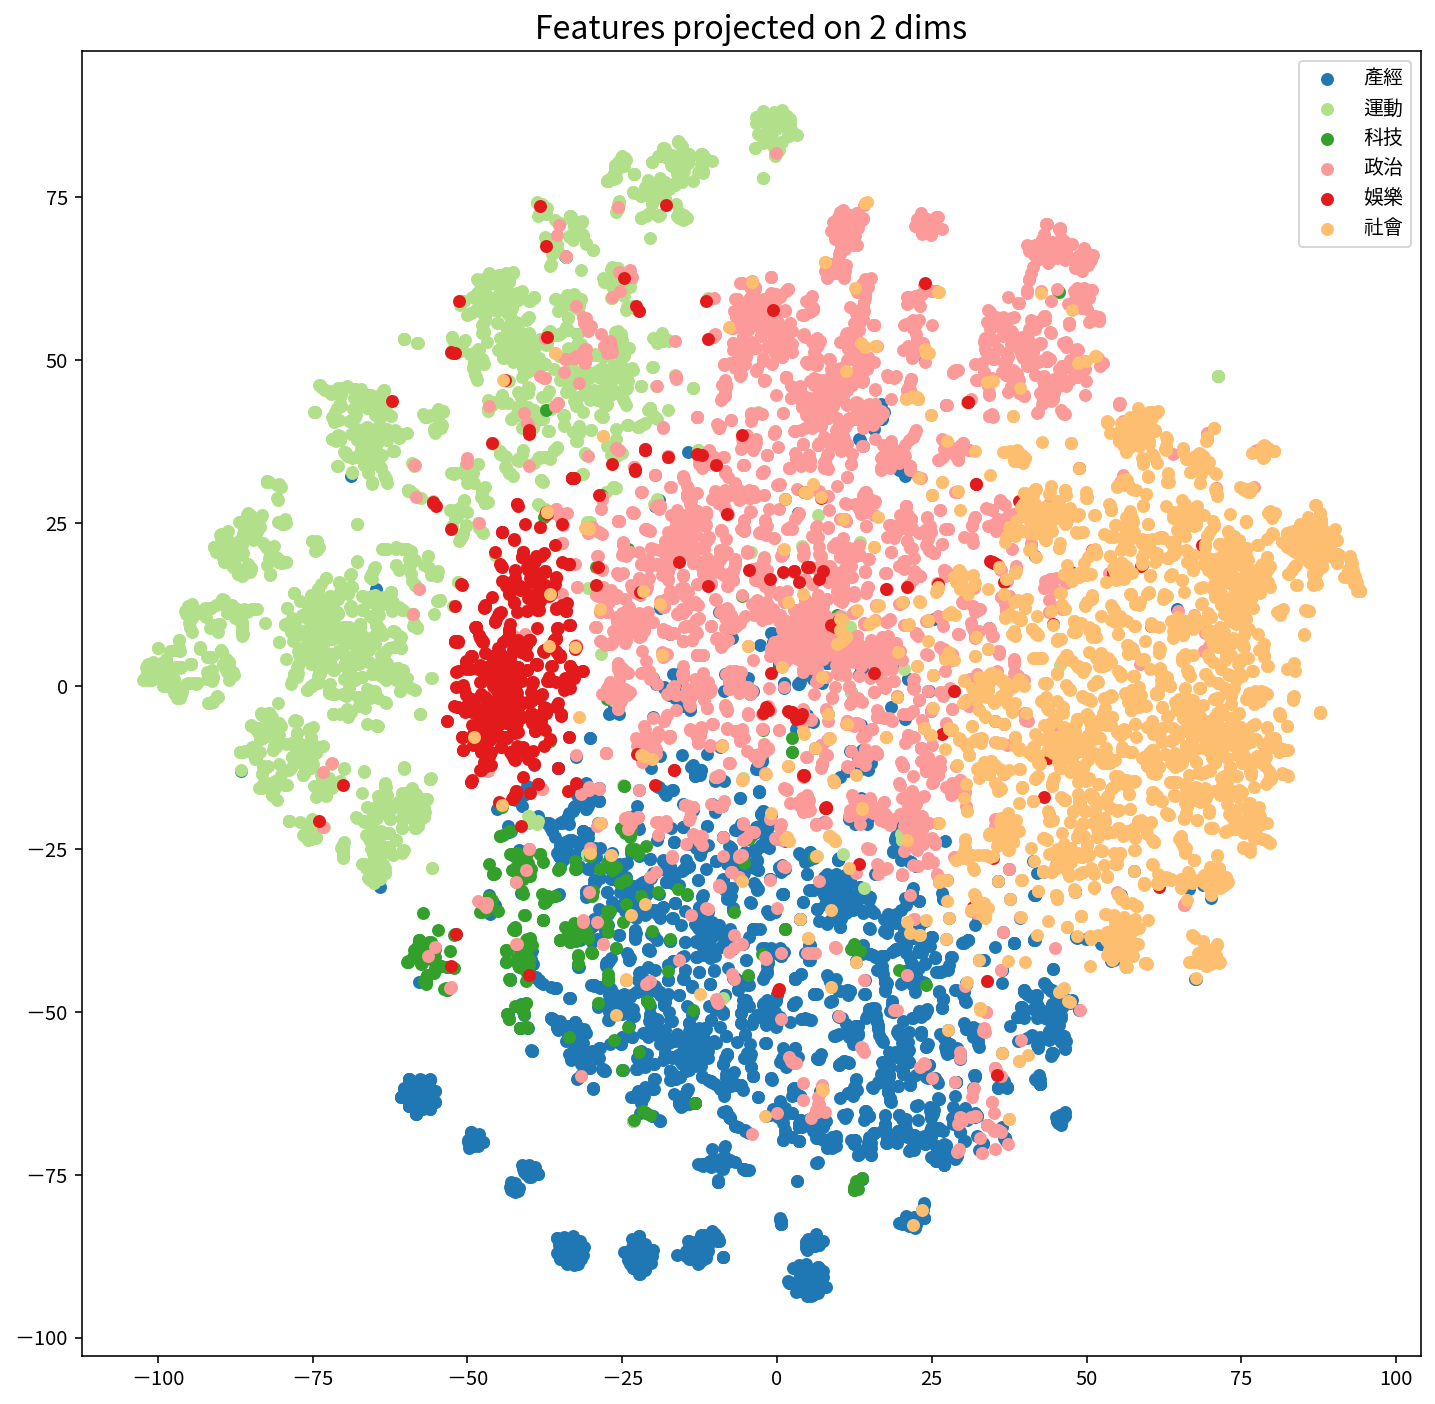

In [55]:
plt.figure(figsize=(12, 12))
for category, color in zip(category_map, colors):
    points = projected_features[(y_train == category).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=color, label=category)
plt.title("Features projected on 2 dims", fontsize=16)
plt.legend()
plt.savefig('scatter_plot.png', bbox_inches='tight', dpi=300)
plt.show()

## Holdout validation

In [21]:
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=2) # set random state to retain results

# Oversample '科技' and '娛樂'

In [22]:
X_train_t['category'] = y_train_t
X_train_t['category'].value_counts()

<ipython-input-22-5415714f6560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t['category'] = y_train_t


政治    2717
產經    2306
社會    2029
運動    1949
娛樂     470
科技     243
Name: category, dtype: int64

In [23]:
lst = [X_train_t]
upsample_category = ['科技', '娛樂']
for cat, group in X_train_t.groupby('category'):
    if cat in upsample_category:
        lst.append(group.sample(1000-len(group), replace=True))
X_train_t_upsample = pd.concat(lst)

In [24]:
X_train_t_upsample['category'].value_counts()
categories = ['政治', '產經', '社會', '運動', '娛樂', '科技']

In [25]:
y_train_t = X_train_t_upsample['category']
X_train_t_upsample.drop(columns='category')

,title,content,joined
6979,世界球后巴蒂有驚無險 晉級法網第二輪[影],澳洲籍世界球后巴蒂今天丟失第2盤後，於決勝盤順利擊敗美國女將培拉（Bernarda Pera...,世界球 后 巴蒂 有驚無險 晉級 法網 第二輪 影 澳洲籍 世界球 后 巴蒂 今天 丟失 第...
5435,王柏融2安好手感 日職生涯百安達成[影],日職北海道日本火腿鬥士隊陣中13人確診武漢肺炎，先前4場比賽延期，今天與樂天金鷲隊交手，火腿...,王柏融 安 好手感 日職 生涯 百安 達成 影 日職 北海道 日本 火腿 鬥士 隊陣 中 人...
19031,北聯幫成員派出所旁追人砸車 北投警速逮10嫌,桃園26歲吳姓男子昨天凌晨駕車到台北市警察局北投分局關渡派出所報案，稱遭人追逐，不料北聯幫成...,北聯 幫 成員 派出所 旁 追人 砸 車 北投 警速 逮 嫌 桃園 歲 吳姓 男子 昨天 凌...
5919,內政部編定社區防疫指引 盼守住防線,內政部營建署編定社區防疫指引，包括觸碰電梯按鈕應多洗手，建議社區室內兒童遊戲室、多功能活動空...,內政部 編定 社區 防疫 指引 盼 守住 防線 內政部 營建署 編定 社區 防疫 指引 包括...
17426,郭台銘翁啟惠同台 示範口水機以唾液驗PCR,鴻海創辦人郭台銘今天出席醫療科技展，特地為所投資的生技新創公司富佳生技站台，生策會會長翁啟惠...,郭台銘 翁啟惠 同台 示範 口水 機 以 唾液 驗 PCR 鴻海 創辦人 郭台銘 今天 出席...
...,...,...,...
3716,台灣團隊開發二代益生菌 有望治療慢性肺阻塞,慢性阻塞性肺病（COPD）可能導致患者呼吸困難，是全球單一疾病第3大死因。台灣團隊開發出可望...,台灣 團隊 開發 二代 益 生菌 有望 治療 慢性 肺 阻塞 慢性 阻塞性 肺病 COPD ...
5067,NASA逾50年來首見 SpaceX太空船夜間降落海上,載著4名太空人返回地球的太空探索科技公司（SpaceX）天龍（Crew Dragon）太空艙...,NASA 逾 年來 首見 SpaceX 太空船 夜間 降落 海上 載著 名 太空人 返回 地...
15424,央行：比特幣交易9成屬投機投資 支付僅占1%,對比特幣等虛擬通貨，中央銀行再次定調，性質應屬虛擬資產或商品而非貨幣，且統計全球近9成比特幣...,央行 比特幣 交易 成屬 投機 投資 支付 僅 占 對 比特幣 等 虛擬 通貨 中央 銀行 ...
1551,推特創辦人拍賣15年前第1則推文 出價飆到5500萬,推特（Twitter）執行長杜錫把自己15年前發出的首條推文拿出來拍賣，今天已經有人喊價到約...,推特 創辦人 拍賣 年前 第 則 推文 出價 飆到 推特 Twitter 執行長 杜錫 把 ...


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, max_features=10000)

X_trans_t = tfidf.fit_transform(X_train_t_upsample['joined']).toarray()

In [27]:
X_val_t = tfidf.transform(X_val['joined']).toarray()

In [28]:
X_val_t.shape

(4164, 10000)

# Model construction
## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_trans_t, y_train_t)

/Users/andychang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Predict validation

In [30]:
y_pred = clf_lr.predict(X_val_t)

In [31]:
X_val_t.shape

(4164, 10000)

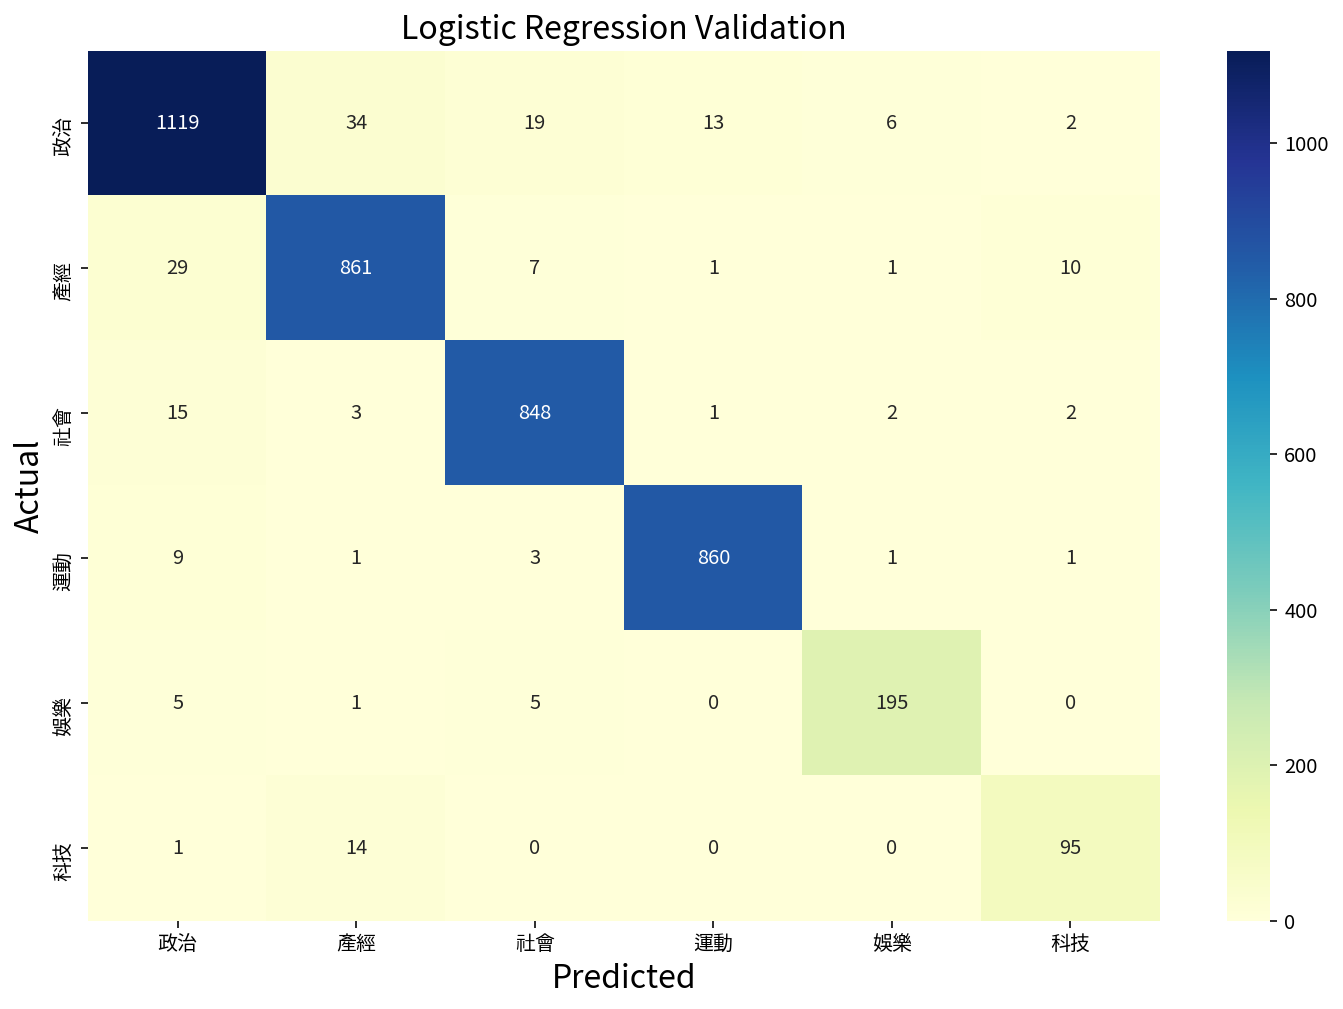

Accuracy: 0.9553
+---------------------+-----------+--------+
| Logistic Regression | Precision | Recall |
+---------------------+-----------+--------+
|         政治        |   0.9499  | 0.9380 |
|         產經        |   0.9420  | 0.9472 |
|         社會        |   0.9615  | 0.9736 |
|         運動        |   0.9829  | 0.9829 |
|         娛樂        |   0.9512  | 0.9466 |
|         科技        |   0.8636  | 0.8636 |
+---------------------+-----------+--------+


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from IPython.core.display import display, HTML
import prettytable as pt
import seaborn as sns

display(HTML("<h2>Logistic Regression Results</h2>"))
plt.figure(figsize=(12, 8))
matrix = confusion_matrix(y_val, y_pred, labels=categories)
sns.heatmap(matrix, fmt='d', cmap="YlGnBu", annot=True, xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual', fontsize=16)
_ = plt.xlabel('Predicted', fontsize=16)
_ = plt.title('Logistic Regression Validation', fontsize=16)
plt.savefig('lr_val.png', bbox_inches='tight', dpi=300)
plt.show()
# _ = plt.ylabel('Actual')
# _ = plt.xlabel('Predicted')

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, labels=categories, average=None)
recall = recall_score(y_val, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Logistic Regression", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

# Multinomial Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_trans_t,y_train_t)
y_pred = clf_nb.predict(X_val_t)

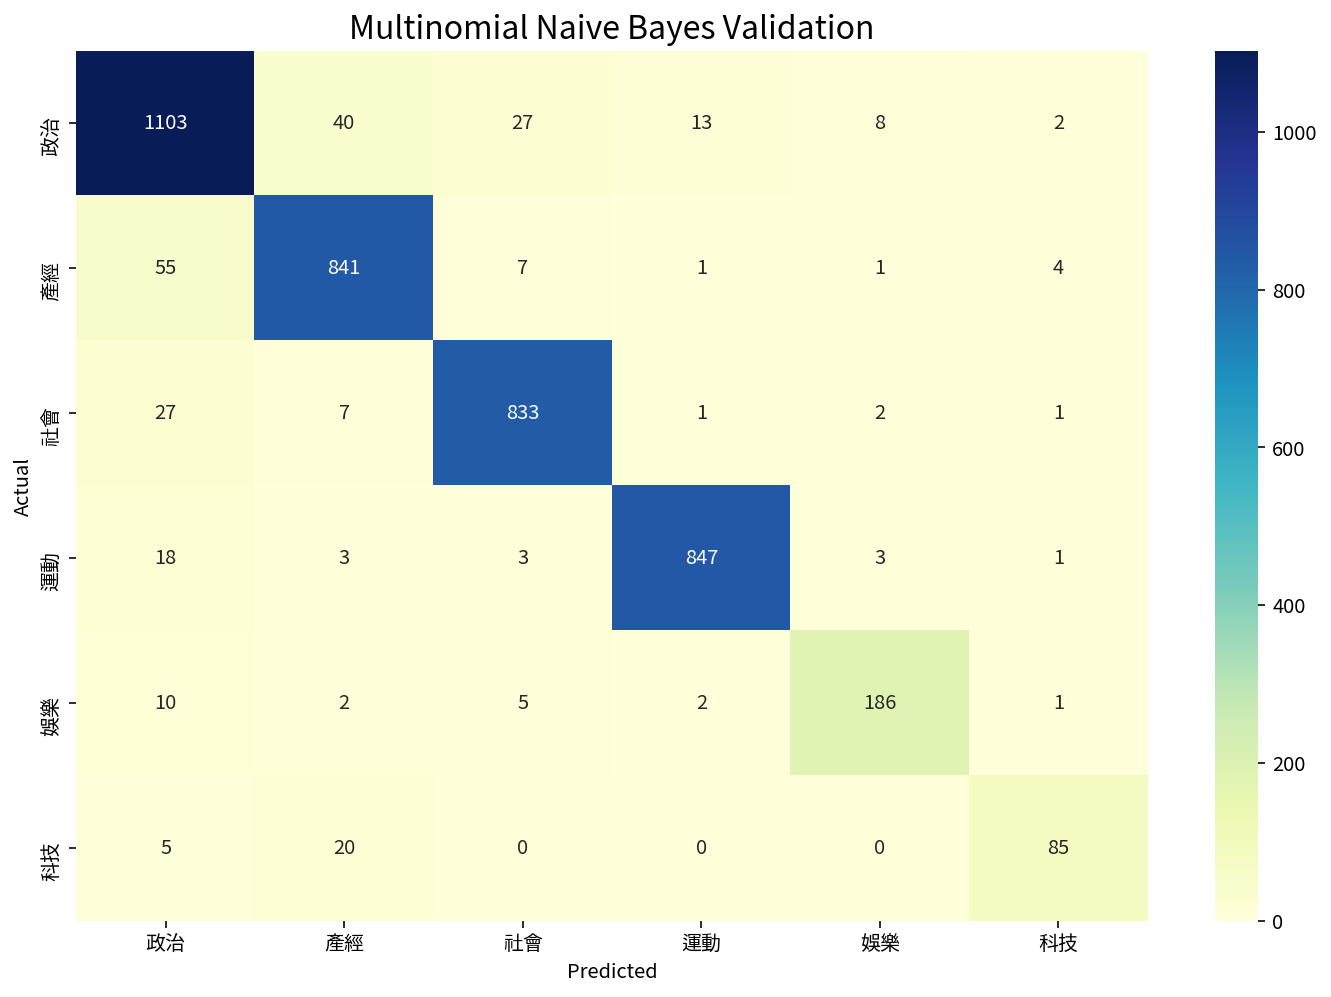

Accuracy: 0.9354
+-------------------------+-----------+--------+
| Multinomial Naive Bayes | Precision | Recall |
+-------------------------+-----------+--------+
|           政治          |   0.9056  | 0.9246 |
|           產經          |   0.9211  | 0.9252 |
|           社會          |   0.9520  | 0.9564 |
|           運動          |   0.9803  | 0.9680 |
|           娛樂          |   0.9300  | 0.9029 |
|           科技          |   0.9043  | 0.7727 |
+-------------------------+-----------+--------+


In [35]:
conf_mat = confusion_matrix(y_val, y_pred, labels=categories)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted')
_ = plt.title('Multinomial Naive Bayes Validation', fontsize=16)
plt.savefig('nb_val.png', bbox_inches='tight', dpi=300)
plt.show()

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, labels=categories, average=None)
recall = recall_score(y_val, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Multinomial Naive Bayes", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

# Artificial Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(1024), random_state=1)

clf_mlp.fit(X_trans_t, y_train_t)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=1024, random_state=1)

In [37]:
y_pred = clf_mlp.predict(X_val_t)

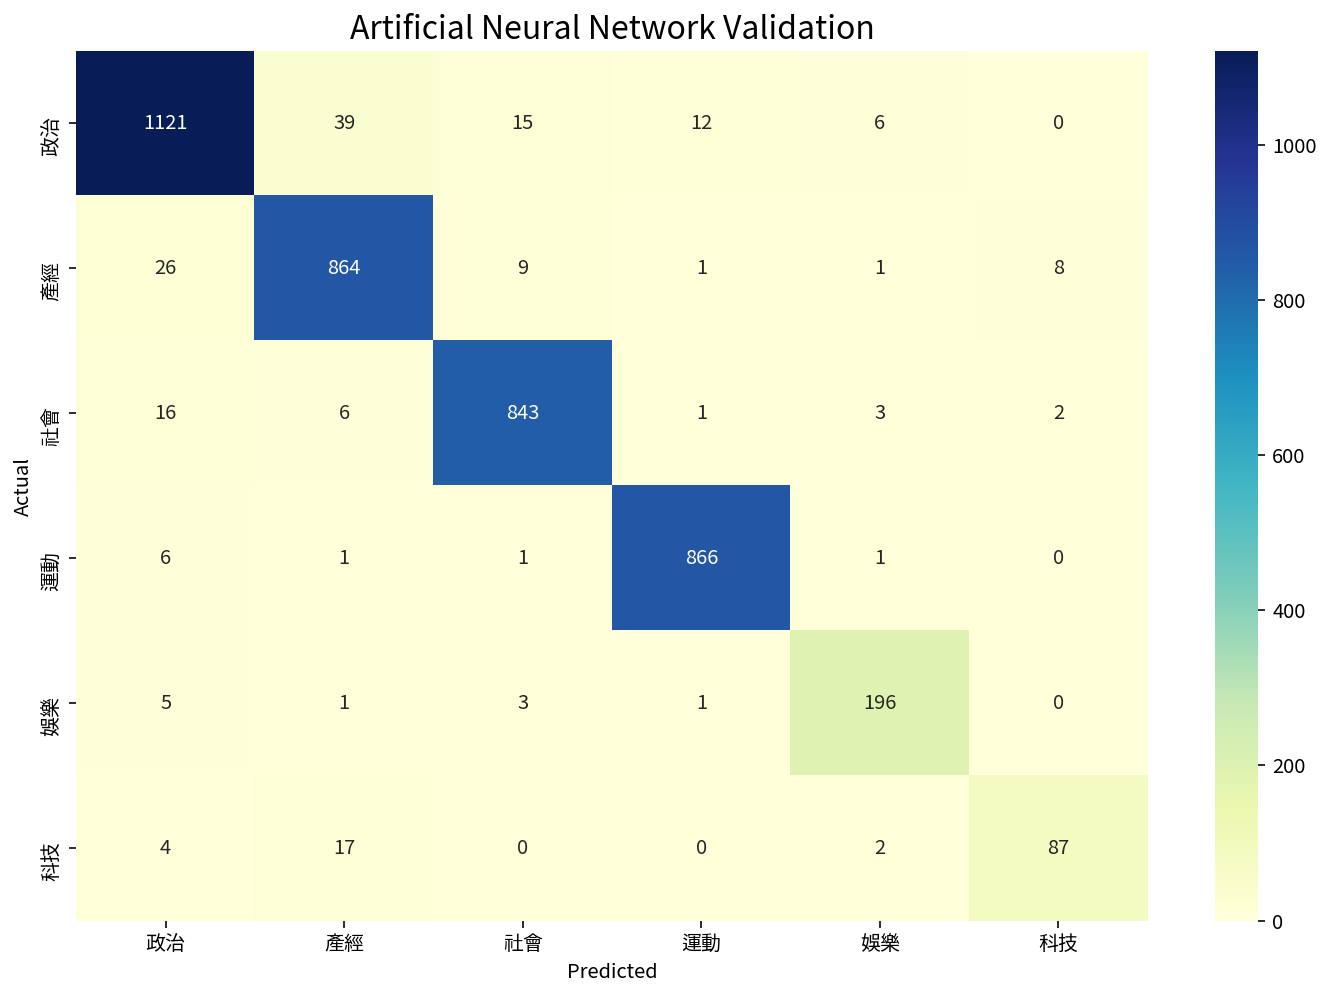

Accuracy: 0.9551
+---------------------------+-----------+--------+
| Artificial Neural Network | Precision | Recall |
+---------------------------+-----------+--------+
|            政治           |   0.9516  | 0.9396 |
|            產經           |   0.9310  | 0.9505 |
|            社會           |   0.9679  | 0.9679 |
|            運動           |   0.9830  | 0.9897 |
|            娛樂           |   0.9378  | 0.9515 |
|            科技           |   0.8969  | 0.7909 |
+---------------------------+-----------+--------+


In [38]:
conf_mat = confusion_matrix(y_val, y_pred, labels=categories)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted')
_ = plt.title('Artificial Neural Network Validation', fontsize=16)
plt.savefig('nn_val.png', bbox_inches='tight', dpi=300)
plt.show()

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, labels=categories, average=None)
recall = recall_score(y_val, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Artificial Neural Network", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

# Process testing data

In [39]:
X_test['joined'] = X_test['title'] + ' ' + X_test['content']
# X_test['joined'] = X_test.loc[:, 'joined'].apply(get_tokens)
# X_test.to_pickle("News_test_split.pkl")

<ipython-input-39-5dad918bc655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['joined'] = X_test['title'] + ' ' + X_test['content']


In [40]:
X_test = pd.read_pickle("News_test_split.pkl")

In [41]:
X_test_trans = tfidf.transform(X_test.joined).toarray()
X_test_trans

array([[0.        , 0.        , 0.05396084, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09090643, 0.09364439, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

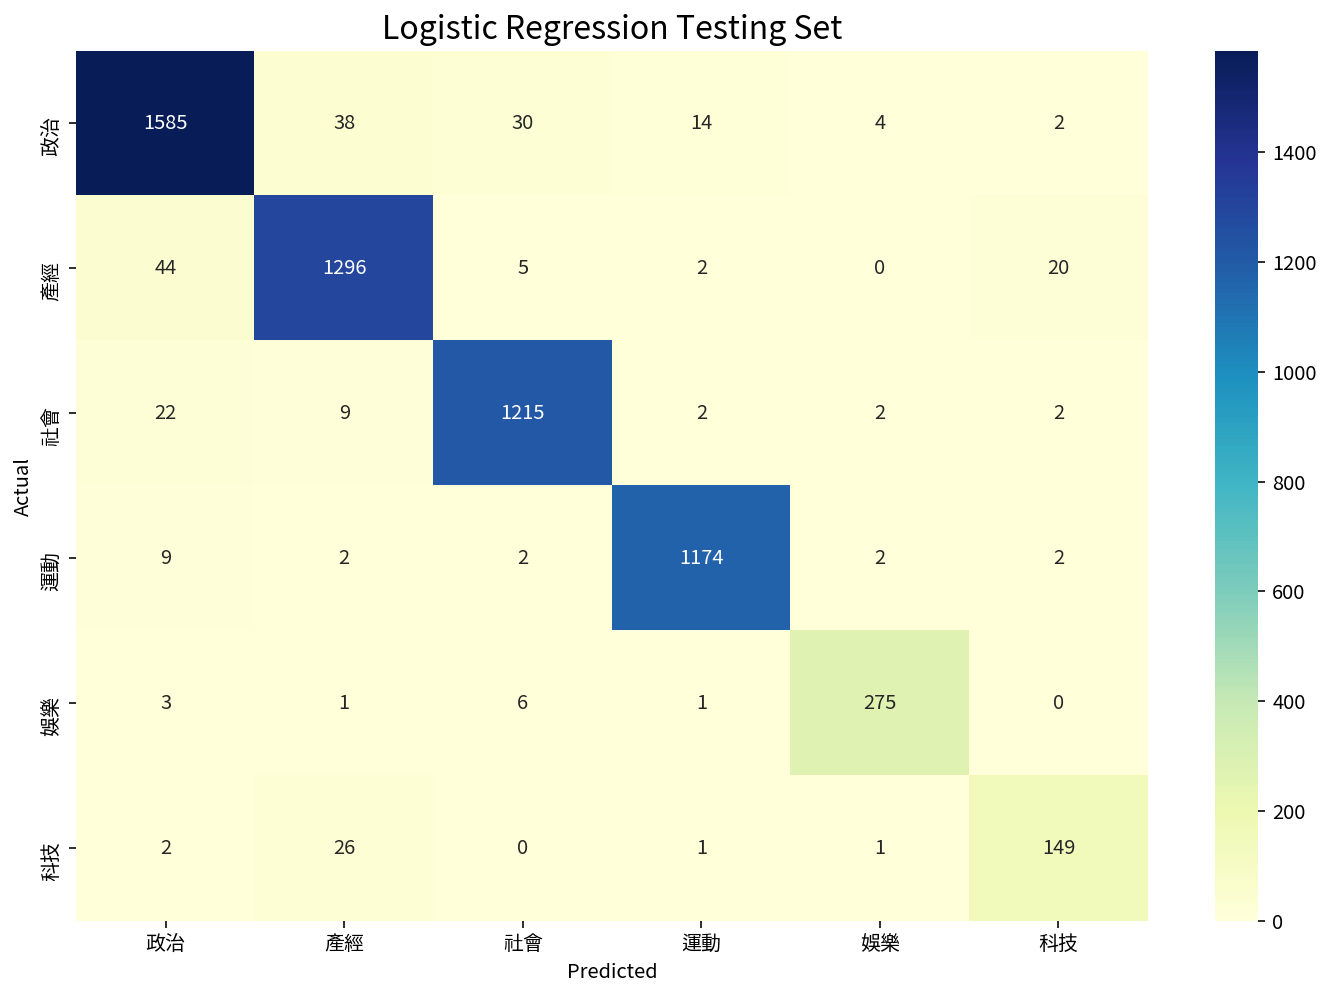

Accuracy: 0.9573
+---------------------+-----------+--------+
| Logistic Regression | Precision | Recall |
+---------------------+-----------+--------+
|         政治        |   0.9520  | 0.9474 |
|         產經        |   0.9446  | 0.9481 |
|         社會        |   0.9658  | 0.9704 |
|         運動        |   0.9832  | 0.9857 |
|         娛樂        |   0.9683  | 0.9615 |
|         科技        |   0.8514  | 0.8324 |
+---------------------+-----------+--------+


In [42]:
y_pred = clf_lr.predict(X_test_trans)
conf_mat = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted')
_ = plt.title('Logistic Regression Testing Set', fontsize=16)
plt.savefig('lr_test.png', bbox_inches='tight', dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, labels=categories, average=None)
recall = recall_score(y_test, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Logistic Regression", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

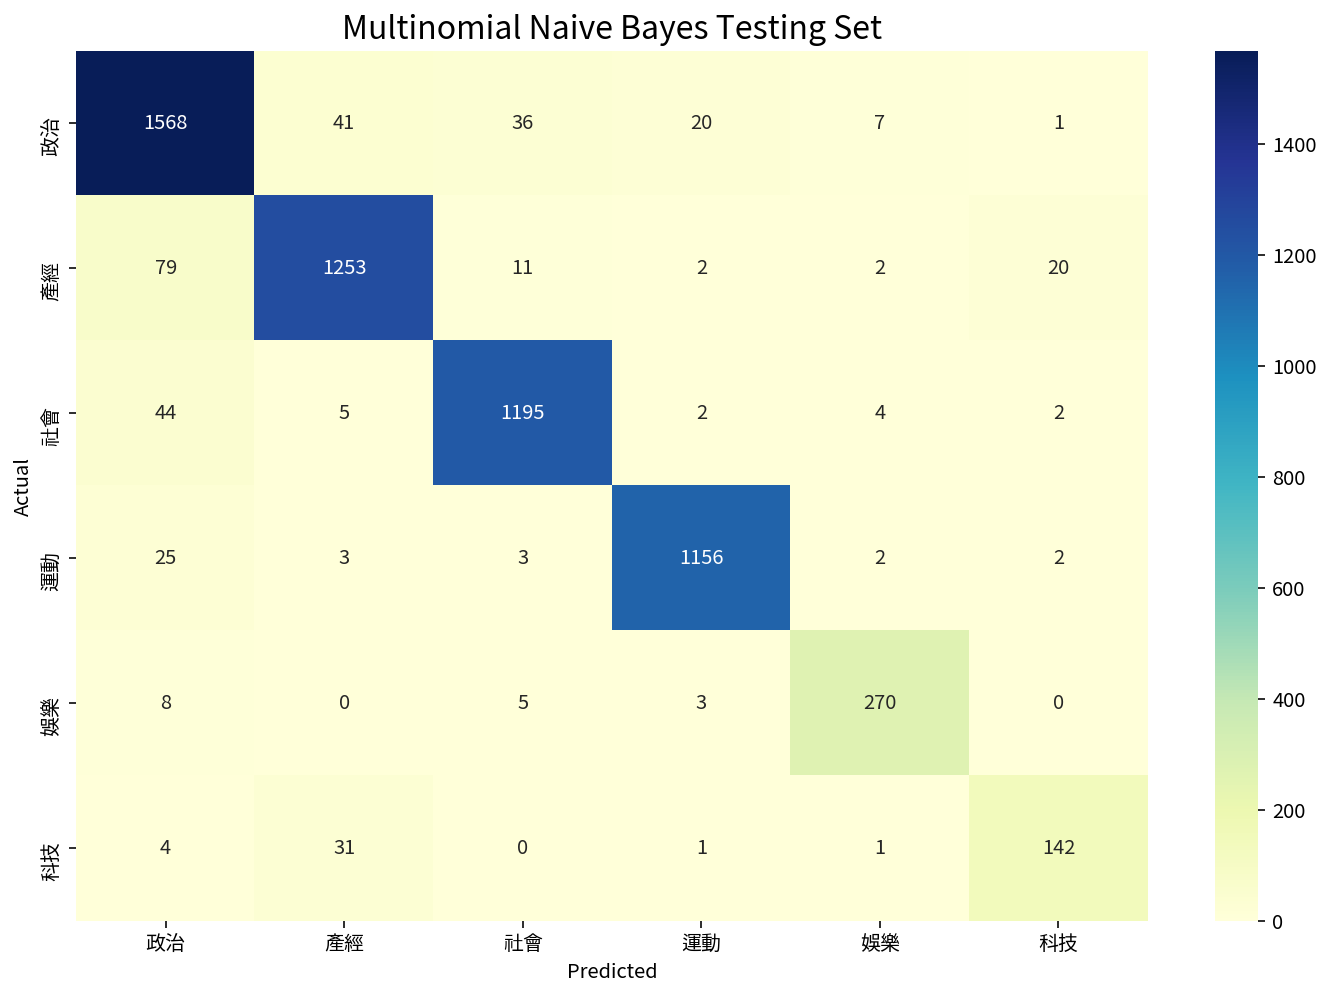

Accuracy: 0.9388
+-------------+-----------+--------+
| Naive Bayes | Precision | Recall |
+-------------+-----------+--------+
|     政治    |   0.9074  | 0.9372 |
|     產經    |   0.9400  | 0.9166 |
|     社會    |   0.9560  | 0.9545 |
|     運動    |   0.9764  | 0.9706 |
|     娛樂    |   0.9441  | 0.9441 |
|     科技    |   0.8503  | 0.7933 |
+-------------+-----------+--------+


In [43]:
y_pred = clf_nb.predict(X_test_trans)
conf_mat = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted')
_ = plt.title('Multinomial Naive Bayes Testing Set', fontsize=16)
plt.savefig('nb_test.png', bbox_inches='tight', dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, labels=categories, average=None)
recall = recall_score(y_test, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Naive Bayes", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

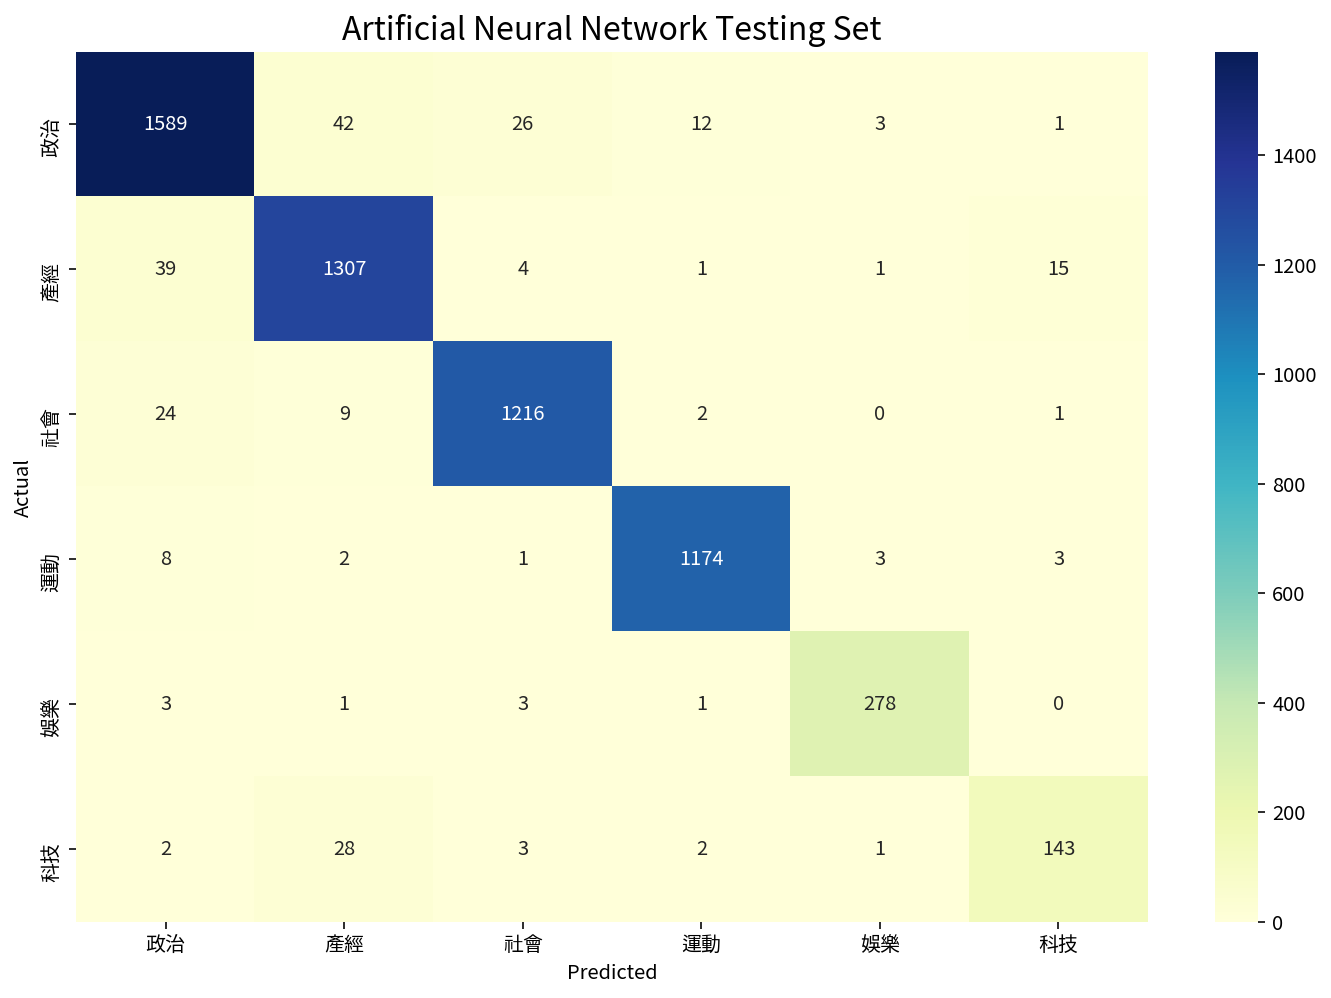

Accuracy: 0.9595
+---------------------------+-----------+--------+
| Artificial Neural Network | Precision | Recall |
+---------------------------+-----------+--------+
|            政治           |   0.9544  | 0.9498 |
|            產經           |   0.9410  | 0.9561 |
|            社會           |   0.9705  | 0.9712 |
|            運動           |   0.9849  | 0.9857 |
|            娛樂           |   0.9720  | 0.9720 |
|            科技           |   0.8773  | 0.7989 |
+---------------------------+-----------+--------+


In [44]:
y_pred = clf_mlp.predict(X_test_trans)
conf_mat = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted')
_ = plt.title('Artificial Neural Network Testing Set', fontsize=16)
plt.savefig('nn_test.png', bbox_inches='tight', dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, labels=categories, average=None)
recall = recall_score(y_test, y_pred, labels=categories, average=None)
print("Accuracy: {:.4f}".format(accuracy))
res = pt.PrettyTable()
precision = [ "{:.4f}".format(prec) for prec in precision ]
recall = [ "{:.4f}".format(rec) for rec in recall ]
res.add_column("Artificial Neural Network", categories)
res.add_column("Precision", precision)
res.add_column("Recall", recall)

print(res)

In [45]:
test_title = "台北電玩展「手遊」躍升主角！多間家機、一線遊戲公司缺席不參加"
test_content = "台北電玩展（TGS）往年是台灣玩家必定朝聖的一大盛會，各大品牌都會在活動釋出最新情報、遊戲試玩，雖然受惠於台灣防疫有成，2021、2022 年都能舉辦實體活動，陣容卻仍受到嚴重打擊。 2022 年台北電玩展將於 22 日開跑，今日主辦單位台北電腦公會正式公開活動內容與參展陣容，前一年被許多網友笑稱是「手遊展」，今年趨勢似乎更加明確，同時陣容更受到打擊，不僅 Sony、微軟等家機遊戲無緣展出，包含萬代、SEGA、Ubisoft 等一線遊戲公司也都沒有參加實體活動。 這股趨勢還不只有遊戲公司，連帶影響電腦設備、周邊產品的公司，例如近年大舉進攻電競領域的華碩、宏碁，今年同樣沒有實體參展。旗下擁有眾多手遊作品的橘子，則選擇自行舉辦「2022橘子嘉年華春節版」。 台灣 Sony PlayStation 表示，沒有實體活動為是整體考量，配合集團的全球政策，但還是會透過線上活動與現場的賽事與玩家互動。華碩則指出，是因疫情而選擇不參加，現階段也不會有與玩家互動的實體活動。 主辦單位台北市電腦公會數位內容組經理蔡宇橞表示，參展陣容受到疫情、邊境管理影響，例如海外遊戲公司無法進入台灣，或是硬體商因為供應鏈缺貨，導致實際產品無法販售、展出，在推廣上可能有一定困難。今年在線上活動，仍邀請了 Sony、萬代，會有製作人演講釋出新資訊。 蔡宇橞不諱言，2021 年的入場人數和過去差很多，可是他們也發現入場的玩家停留時間很長，忠誠度非常高，希望今年的人潮能與去年打平。至於談到手遊，她認為這是趨勢所導致，市場消費很大一塊都在行動市場，至於在獨立遊戲的區塊，還是能看到許多跨平台的作品。台北電玩展（TGS）往年是台灣玩家必定朝聖的一大盛會，各大品牌都會在活動釋出最新情報、遊戲試玩，雖然受惠於台灣防疫有成，2021、2022 年都能舉辦實體活動，陣容卻仍受到嚴重打擊。 2022 年台北電玩展將於 22 日開跑，今日主辦單位台北電腦公會正式公開活動內容與參展陣容，前一年被許多網友笑稱是「手遊展」，今年趨勢似乎更加明確，同時陣容更受到打擊，不僅 Sony、微軟等家機遊戲無緣展出，包含萬代、SEGA、Ubisoft 等一線遊戲公司也都沒有參加實體活動。 這股趨勢還不只有遊戲公司，連帶影響電腦設備、周邊產品的公司，例如近年大舉進攻電競領域的華碩、宏碁，今年同樣沒有實體參展。旗下擁有眾多手遊作品的橘子，則選擇自行舉辦「2022橘子嘉年華春節版」。 台灣 Sony PlayStation 表示，沒有實體活動為是整體考量，配合集團的全球政策，但還是會透過線上活動與現場的賽事與玩家互動。華碩則指出，是因疫情而選擇不參加，現階段也不會有與玩家互動的實體活動。 主辦單位台北市電腦公會數位內容組經理蔡宇橞表示，參展陣容受到疫情、邊境管理影響，例如海外遊戲公司無法進入台灣，或是硬體商因為供應鏈缺貨，導致實際產品無法販售、展出，在推廣上可能有一定困難。今年在線上活動，仍邀請了 Sony、萬代，會有製作人演講釋出新資訊。蔡宇橞不諱言，2021 年的入場人數和過去差很多，可是他們也發現入場的玩家停留時間很長，忠誠度非常高，希望今年的人潮能與去年打平。至於談到手遊，她認為這是趨勢所導致，市場消費很大一塊都在行動市場，至於在獨立遊戲的區塊，還是能看到許多跨平台的作品。"
test_text = test_title + ' ' + test_content
test_text2 = "證交法將修正 大股東持股5％要「全都露」 金管會昨天（11日）宣布，將啟動修正「證券交易法」共有2大修正內容，第1是強化我國公司持股透明化，讓藏鏡人無所遁形、大股東全都露，持股「申報」及「公告」門檻，從原本規定10%修訂為5%。第2是提高裁罰門檻，若證券商等相關機構，未建立落實內稽內控等重大缺失，罰鍰上限也將由現行480萬元拉高到600萬元。證交法最近一次修正為去年元月27日，而金管會今年要再度啟動修法。金管會證期局副局長蔡麗玲表示，為使國內公司股權重大異動之資訊能即時且充分公開，並為符合外國立法之趨勢，適時修正大量持股申報及公告門檻。根據金管會規劃修法草案，將調降大量持股申報及公告之門檻規定，從持股10%修正為5%，未來，外界可以更清楚公司經營及股價變化，這也是美日多數國家採用的門檻。蔡麗玲表示，自2020年第1季起，我國上市櫃公司財務報告已要求揭露持股比例達5%股東資訊，不過，未來更進一步，必須立即申報及公告，而非等到財報公布（1年公布5次）。根據證期局統計，2020年12月底，上市櫃及興櫃公司，持股5％以上、但低於10％的股東，共有3266人次，持有1390家的公司股票。蔡麗玲指出，為了利於相關配套法令之訂定或修正及外界實務運作之調整，有足夠時間準備及因應，金管會預計給予緩衝期，明定修正公布後1年施行。其次，為強化證券商、證券服務事業及證券相關機構之法令遵循，達到使裁罰具勸阻性之效果，並兼顧金融市場發展，適度提高罰鍰額度上限。金管會表示，若證券商、證券服務事業及證券相關機構，未完善建立或未確實執行內部控制制度等行為，對其本身及客戶恐致重大損失或影響市場秩序及公平性，對證券商等機構違反規定之罰鍰上限由480萬元提高至600萬元。"
test_text3 = "國民黨中常委提案改黨名 洪秀柱怒批：沒出息 從四項公投到補選、罷免，國民黨在一個月內經歷了3場挫敗。國民黨有中常委提案，要修改國民黨的黨名為「台灣國民黨」。國民黨前主席洪秀柱今天（13日）對此怒斥，那是一個非常沒有出息的想法跟做法，如果黨內還是有人這樣去做，就離開這個政黨吧。洪秀柱13日受訪表示，民黨是個百年政黨，是創建中華民國的政黨，它的名字就叫中國國民黨。如果我們的心還停留在台灣這個小小的地方，就違背我們的憲法，國民黨也不夠資格，就變成地方的政黨，不是全中國的一個政黨，她認為，那是一個非常沒有出息的想法跟做法，如果黨內還是有人這樣去做的話，就離開這個政黨吧，去成立他自己的「台灣國民黨」好了。洪秀柱表示，對朱立倫的千字文，以及四大公投沒有過關，她當然心裡十分難受，國民黨主席朱立倫不出來開記者會，她個人認為是不智的決定，不夠聰明。因不管輸贏，尤其是失敗了，你更要勇於承擔，站出來把話講清楚說明白，檢討自己的問題在哪裡，這才是最正確的作法，所以她感到非常遺憾，或許有人給他做了一些建議，但這個建議是害他。"
test_list = [test_text, test_text2, test_text3]
for text in test_list:
    print(text)
    print("")

台北電玩展「手遊」躍升主角！多間家機、一線遊戲公司缺席不參加 台北電玩展（TGS）往年是台灣玩家必定朝聖的一大盛會，各大品牌都會在活動釋出最新情報、遊戲試玩，雖然受惠於台灣防疫有成，2021、2022 年都能舉辦實體活動，陣容卻仍受到嚴重打擊。 2022 年台北電玩展將於 22 日開跑，今日主辦單位台北電腦公會正式公開活動內容與參展陣容，前一年被許多網友笑稱是「手遊展」，今年趨勢似乎更加明確，同時陣容更受到打擊，不僅 Sony、微軟等家機遊戲無緣展出，包含萬代、SEGA、Ubisoft 等一線遊戲公司也都沒有參加實體活動。 這股趨勢還不只有遊戲公司，連帶影響電腦設備、周邊產品的公司，例如近年大舉進攻電競領域的華碩、宏碁，今年同樣沒有實體參展。旗下擁有眾多手遊作品的橘子，則選擇自行舉辦「2022橘子嘉年華春節版」。 台灣 Sony PlayStation 表示，沒有實體活動為是整體考量，配合集團的全球政策，但還是會透過線上活動與現場的賽事與玩家互動。華碩則指出，是因疫情而選擇不參加，現階段也不會有與玩家互動的實體活動。 主辦單位台北市電腦公會數位內容組經理蔡宇橞表示，參展陣容受到疫情、邊境管理影響，例如海外遊戲公司無法進入台灣，或是硬體商因為供應鏈缺貨，導致實際產品無法販售、展出，在推廣上可能有一定困難。今年在線上活動，仍邀請了 Sony、萬代，會有製作人演講釋出新資訊。 蔡宇橞不諱言，2021 年的入場人數和過去差很多，可是他們也發現入場的玩家停留時間很長，忠誠度非常高，希望今年的人潮能與去年打平。至於談到手遊，她認為這是趨勢所導致，市場消費很大一塊都在行動市場，至於在獨立遊戲的區塊，還是能看到許多跨平台的作品。台北電玩展（TGS）往年是台灣玩家必定朝聖的一大盛會，各大品牌都會在活動釋出最新情報、遊戲試玩，雖然受惠於台灣防疫有成，2021、2022 年都能舉辦實體活動，陣容卻仍受到嚴重打擊。 2022 年台北電玩展將於 22 日開跑，今日主辦單位台北電腦公會正式公開活動內容與參展陣容，前一年被許多網友笑稱是「手遊展」，今年趨勢似乎更加明確，同時陣容更受到打擊，不僅 Sony、微軟等家機遊戲無緣展出，包含萬代、SEGA、Ubisoft 等一線遊戲公司也都沒有參加實體活動。 這股趨勢還不只有遊戲公司，連帶影響電腦設備、周邊產品的公司，例如近年大舉進攻電競領域的華碩、宏碁

In [46]:
inputTokens = [ get_tokens(text) for text in test_list ]
inputEncoded = tfidf.transform(inputTokens).toarray()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ns/h3fx1q5d3g1gjrzwm3v1z8pr0000gn/T/jieba.cache
Loading model cost 0.485 seconds.
Prefix dict has been built succesfully.


In [47]:
print(clf_lr.predict(inputEncoded))
print(clf_nb.predict(inputEncoded))
print(clf_mlp.predict(inputEncoded))

['科技' '產經' '政治']
['產經' '產經' '政治']
['科技' '產經' '政治']
